# Auto Machine Learning con Algoritmos Genéticos - TPOT

*TPOT (Tree-based Pipeline Optimization Tool) es una herramienta de aprendizaje automático automatizado de Python que optimiza los procesos de aprendizaje automático mediante programación genética.*

Referencias: [TPOT](https://epistasislab.github.io/tpot/)

TPOT automatizará la parte más tediosa del aprendizaje automático explorando inteligentemente miles de posibles canalizaciones (*pipelines*) para encontrar la mejor para sus datos.

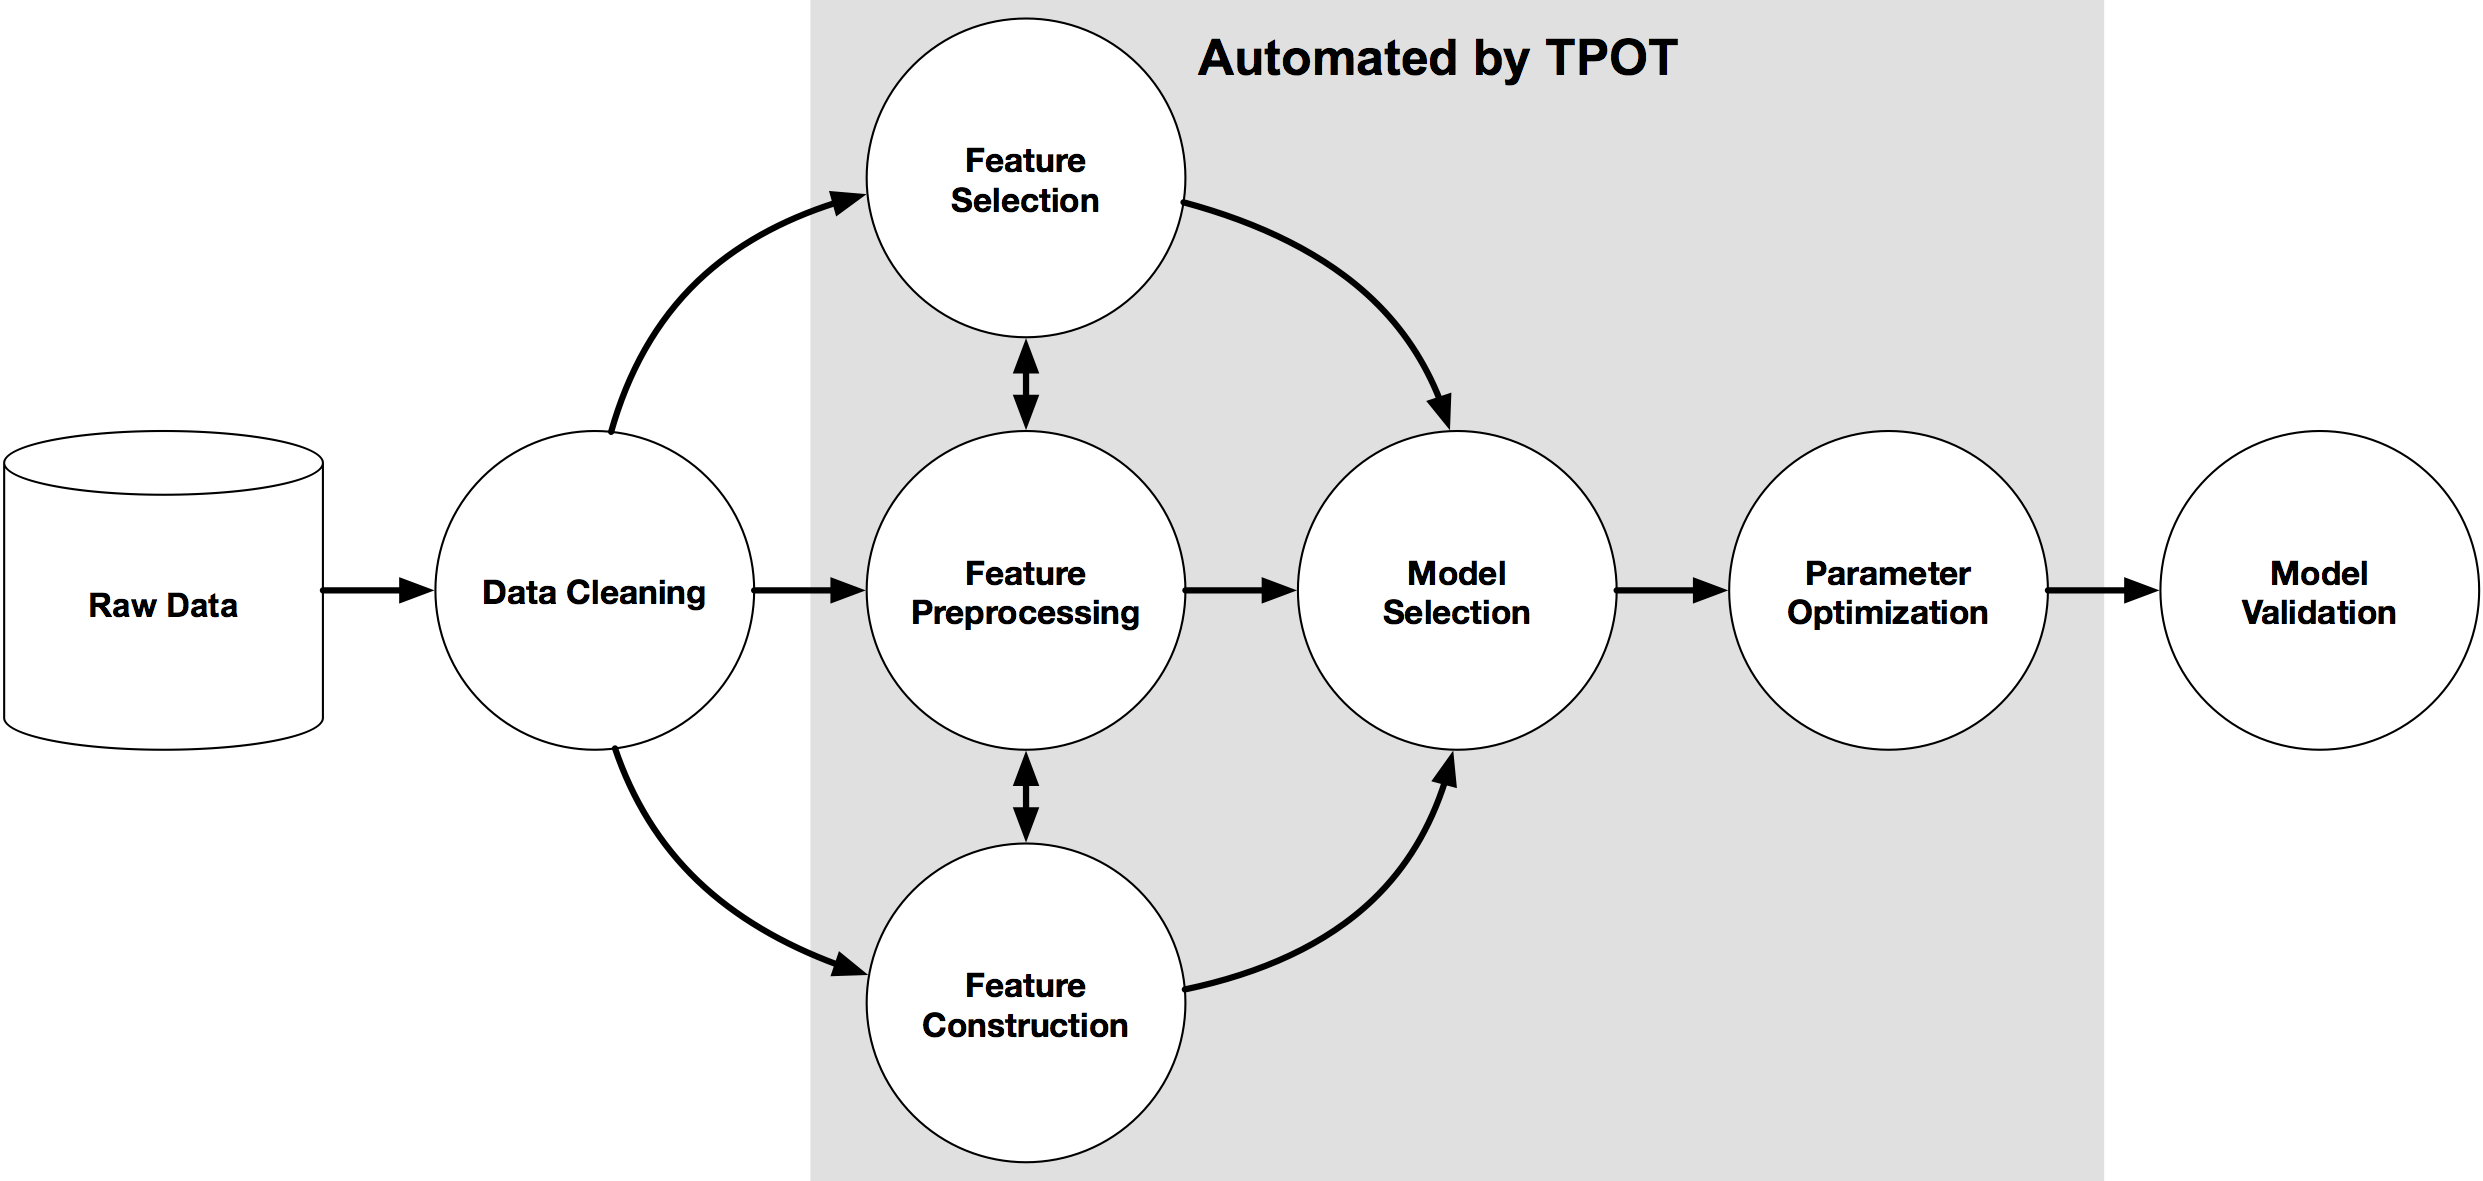

Una vez que TPOT termina la búsqueda (o se cansa de esperar), le proporciona el código Python para la mejor canalización que encontró para que pueda modificar la canalización desde allí.

Un ejemplo de un pipeline logrado con TPOT:

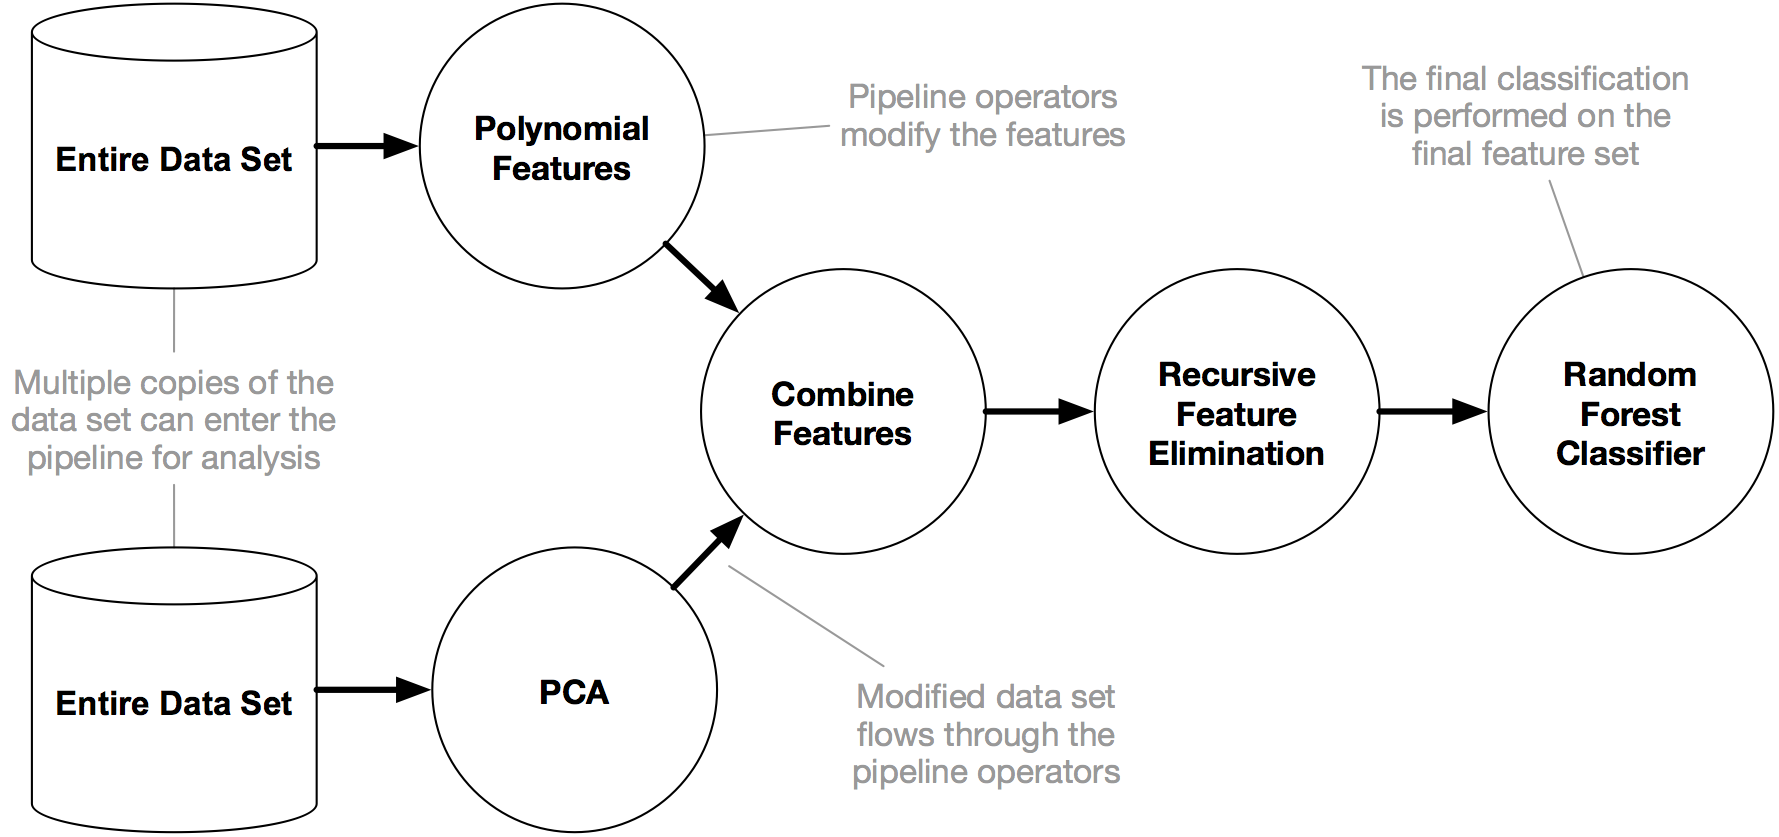

TPOT está construido sobre scikit-learn, por lo que todo el código que genera debería resultarle familiar...

# TPOT

In [1]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=1bad2cc4dffcf00f038b01388d5b6f7664a4205a3b9d82c9b9481cf11b116ff3
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


## Clasificación

### Análisis Exploratorio de Datos

In [2]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t" -O dataset_ADL_clasificacion.zip

--2023-12-07 14:18:13--  https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t
Resolving drive.google.com (drive.google.com)... 209.85.145.100, 209.85.145.101, 209.85.145.102, ...
Connecting to drive.google.com (drive.google.com)|209.85.145.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ne9j5pvip9qc5m2d1l85c5oqsoiet0jn/1701958650000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=f3f41eda-fa47-42ee-981b-993c7c4f182a [following]
--2023-12-07 14:18:14--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ne9j5pvip9qc5m2d1l85c5oqsoiet0jn/1701958650000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=f3f41eda-fa47-42ee-981b-993c7c4f182a
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 173.194.74.

In [3]:
!unzip dataset_ADL_clasificacion.zip

Archive:  dataset_ADL_clasificacion.zip
  inflating: dataset_ADL_clasificacion.csv  


In [4]:
# Lectura del dataset
import pandas as pd
dataset = pd.read_csv("dataset_ADL_clasificacion.csv")

In [5]:
dataset

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


### Preprocesamiento

In [6]:
# Tratamiento de los datos y división del dataset
from sklearn.model_selection import train_test_split

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['Situacion']
X = dataset.drop('Situacion', axis=1)

# Acá iría algún tratamiento especial según lo analizado (después lo vemos)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
                        # shuffle mezcla el dataset, si miramos el csv... están bastante agrupados por categorías
                        # random_state establece una semilla para el mezclador, así se garantiza repetibilidad
                        # test_size establece el tamaño porcentual para el subset de test

### TPOTClassifier

In [7]:
from tpot import TPOTClassifier

In [8]:
from tpot import TPOTClassifier


# Ejemplo rápido limitando el tiempo a 2 minutos, la idea de estas implementaciones es buscar en el inmenso hiperespacio por horas....
tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


2.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=3, n_estimators=100)
0.9675090252707581


In [16]:
tpot = TPOTClassifier(verbosity=2, n_jobs=-1)   # Otro ejemplo, habilitando todos los hilos del CPU en este caso
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9605010325940558

Generation 2 - Current best internal CV score: 0.9605010325940558

Generation 3 - Current best internal CV score: 0.9605010325940558

Generation 4 - Current best internal CV score: 0.9628266139894046

Generation 5 - Current best internal CV score: 0.9674687977013559

Generation 6 - Current best internal CV score: 0.9674717907276047

Generation 7 - Current best internal CV score: 0.9674717907276047

Generation 8 - Current best internal CV score: 0.9674717907276047

Generation 9 - Current best internal CV score: 0.9674717907276047

Generation 10 - Current best internal CV score: 0.9674717907276047

Generation 11 - Current best internal CV score: 0.9697913860704558

Generation 12 - Current best internal CV score: 0.9697913860704558

Generation 13 - Current best internal CV score: 0.9697913860704558

Generation 14 - Current best internal CV score: 0.9697913860704558

Generation 15 - Current best internal CV score: 0.969794

In [12]:
tpot = TPOTClassifier(verbosity=2, generations=50, n_jobs=-1)   # Limitando generaciones
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/5100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9543024752327078

Generation 2 - Current best internal CV score: 0.9581694651462094

Generation 3 - Current best internal CV score: 0.9597258387956062

Generation 4 - Current best internal CV score: 0.9597258387956062

Generation 5 - Current best internal CV score: 0.9643650294813085

Generation 6 - Current best internal CV score: 0.964374008560055


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
0.9620938628158845


Argumentos por defecto para la instancia de búsqueda:

```
TPOTClassifier(generations: int = 100, population_size: int = 100,
offspring_size: Any | None = None, mutation_rate: float = 0.9, crossover_rate:
float = 0.1, scoring: Any | None = None, cv: int = 5, subsample: float = 1,
n_jobs: int = 1, max_time_mins: Any | None = None, max_eval_time_mins: int = 5,
random_state: Any | None = None, config_dict: Any | None = None, template:
Any | None = None, warm_start: bool = False, memory: Any | None = None,
use_dask: bool = False, periodic_checkpoint_folder: Any | None = None,
early_stop: Any | None = None, verbosity: int = 0, disable_update_check: bool =
False, log_file: Any | None = None)
```



In [13]:
# Exportación del pipeline óptimo encontrado
tpot.export('tpot_ADL_pipeline.py')
# Visualización de lo exportado (lo mismo del archivo .py)
print(tpot.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.964374008560055
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [11]:
# Pipeline interactivo
tpot.fitted_pipeline_

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

## Regresión

### Análisis Exploratorio de Datos

In [14]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t" -O dataset_hormigon_regresion.zip
!unzip dataset_hormigon_regresion.zip

--2023-12-06 23:02:27--  https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t
Resolving drive.google.com (drive.google.com)... 108.177.13.100, 108.177.13.101, 108.177.13.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.13.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h1p95ccbk5ndrirj9u135mcp0kukusdv/1701903675000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=7bb99ef4-cdc3-475b-b0dc-bea255a3c7c2 [following]
--2023-12-06 23:02:27--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h1p95ccbk5ndrirj9u135mcp0kukusdv/1701903675000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=7bb99ef4-cdc3-475b-b0dc-bea255a3c7c2
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 108.177.13.

In [15]:
dataset = pd.read_csv("dataset_hormigon_regresion.csv")
dataset.drop_duplicates(inplace=True)

In [16]:
# Definimos Entradas y Salidas
X = dataset.drop('csMPa', axis=1)    #drop quita una columna de un dataframe, y devuelve otra dataframe
y = dataset['csMPa']                 #Asignamos únicamente la columna de interés

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### TPOTRegressor

In [18]:
from tpot import TPOTRegressor

In [19]:
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, n_jobs=-1, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -29.024478302434858

Generation 2 - Current best internal CV score: -23.79414461132736

Generation 3 - Current best internal CV score: -23.79414461132736

Generation 4 - Current best internal CV score: -23.09117094549746

Generation 5 - Current best internal CV score: -23.09117094549746

Generation 6 - Current best internal CV score: -23.09117094549746

Generation 7 - Current best internal CV score: -22.72836746498342

Generation 8 - Current best internal CV score: -22.72836746498342

Generation 9 - Current best internal CV score: -22.72836746498342

Generation 10 - Current best internal CV score: -22.72836746498342

Best pipeline: GradientBoostingRegressor(StandardScaler(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01)), alpha=0.75, learning_rate=0.1, loss=huber, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=18, n_estimators=100, subsample=0.55)
-16.415029976126696


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

preds = tpot.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, preds)))
print('R squared: ', r2_score(y_test, preds))

RMSE:  4.051546615321944
R squared:  0.9331052348597411


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [20]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75,
                                                          random_state=42,
                                                          tol=0.01))),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.75, loss='huber',
                                           max_depth=10, max_features=0.5,
                                           min_samples_leaf=2,
                                           min_samples_split=18,
                                           random_state=42, subsample=0.55))])

In [22]:
tpot.export('tpot_hormigon_pipeline.py')
print(tpot.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -22.72836746498342
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75, tol=0.01)),
    StandardScaler(),
    GradientBoostingRegressor(alpha=0.75, learning_rate

**Otra instancia, para contrastar...**

In [23]:
tpot = TPOTRegressor(generations=25, population_size=150, verbosity=2, n_jobs=-1, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/3900 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -28.69306031348777

Generation 2 - Current best internal CV score: -25.974081804589936

Generation 3 - Current best internal CV score: -25.974081804589936

Generation 4 - Current best internal CV score: -25.26959174503138

Generation 5 - Current best internal CV score: -25.26959174503138

Generation 6 - Current best internal CV score: -25.237942641823686

Generation 7 - Current best internal CV score: -25.21832896727242

Generation 8 - Current best internal CV score: -23.801256508648304

Generation 9 - Current best internal CV score: -23.801256508648304

Generation 10 - Current best internal CV score: -23.58123053642145

Generation 11 - Current best internal CV score: -23.330403030064947

Generation 12 - Current best internal CV score: -23.330403030064947

Generation 13 - Current best internal CV score: -23.330403030064947

Generation 14 - Current best internal CV score: -23.20524787584306

Generation 15 - Current best internal CV score: 

In [24]:
preds = tpot.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, preds)))
print('R squared: ', r2_score(y_test, preds))

RMSE:  3.8516401228968036
R squared:  0.9395436591904508


In [25]:
tpot.export('tpot_hormigon_pipeline.py')
print(tpot.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -22.402864979896947
exported_pipeline = GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="huber", max_depth=10, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.5)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exporte